# Data Loader

The following code takes random samples from the h5 dataset (see previous notebook or the make features command) and empirically validates it.

It also contains some scrap code to efficiently generate batches.

In [1]:
%matplotlib notebook
import numpy as np
import h5py
import random

from matplotlib import animation

import os

from play_skeleton import *
from joints import *

ntu_path = "/media/gnocchi/Seagate Backup Plus Drive/NTU-RGB-D/"

rgb_folder = "nturgb+d_rgb/"
skeleton_folder = "nturgb+d_skeletons/"

h5_dataset_path = "/media/gnocchi/Seagate Backup Plus Drive/NTU-RGB-D/"
dataset_file_name = "datasets.h5"
log_file_name = "log.txt"

### Create list of samples from the log file (contains all sample names)

In [2]:
# Sample names in a list
samples_names_list = [line.rstrip('\n') for line in open(h5_dataset_path + log_file_name)]
print(len(samples_names_list))

# Take random elements from list
# 1. Shuffle elements
random.shuffle(samples_names_list)

# 2. Take first n elements
n = 10
batch = samples_names_list[:n]

# 3. Remove first n elements
new_samples_names_list = samples_names_list[n:]

56880


### Separate between cross-view and cross-subject sets

S : setup number 

C : camera id

P : performer id

R : replication number

A : action label

In [3]:
# Cross subject
training_subjects = [1, 2, 4, 5, 8, 9, 13, 14, 15, 16, 17, 18, 19, 25, 27, 28, 31, 34, 35, 38]

# Cross view
training_cameras = [2, 3]

In [4]:
# Create strings with subject ids
training_subjects_pxxx = []
for s in training_subjects:
    training_subjects_pxxx.append("P{:03d}".format(s))
    
# Create strings with camera ids
training_cameras_cxxx = []
for s in training_cameras:
    training_cameras_cxxx.append("C{:03d}".format(s))

In [5]:
# Get cs training samples (40320 samples)
cs_training_samples_list = [s for s in samples_names_list if any(xs in s for xs in training_subjects_pxxx)]

# Get cs testing samples
cs_testing_samples_list = set(samples_names_list) - set(cs_training_samples_list)


In [6]:
# Get cv training samples
cv_training_samples_list = [s for s in samples_names_list if any(xs in s for xs in training_cameras_cxxx)]

# Get cv testing samples
cv_testing_samples_list = set(samples_names_list) - set(cv_training_samples_list)


### Get class vector from sample list

In [14]:
random.shuffle(cv_training_samples_list)
mini_batch = cv_training_samples_list[:10]

# Extract class
class_vector = [int(x[-3:]) for x in mini_batch]


['S010C003P021R002A009', 'S012C003P017R002A025', 'S013C003P025R002A012', 'S004C003P020R002A021', 'S006C002P019R002A027', 'S007C002P008R002A050', 'S002C003P008R001A053', 'S009C003P015R001A020', 'S001C003P003R002A045', 'S010C002P021R002A004']
[9, 25, 12, 21, 27, 50, 53, 20, 45, 4]


## Random sample

skeleton : (3, max_frame, num_joint=25, 2) numpy array

hand_crops : (max_frame, n_hands = {2, 4}, crop_size, crop_size, 3)

In [8]:
sample_name = os.path.splitext(random.choice(os.listdir(ntu_path + skeleton_folder)))[0]

dataset = h5py.File(h5_dataset_path + dataset_file_name, 'r')

# List of samples (takes too long)
# a_group_key = list(dataset.keys())

skeleton = dataset[sample_name]["skeleton"][:]
hand_crops = dataset[sample_name]["rgb"][:]
num_frames = hand_crops.shape[0]
print(skeleton.shape)
print(hand_crops.shape)

dataset.close()

(3, 116, 25, 2)
(116, 2, 50, 50, 3)


In [9]:
# animateJointCoordinates(skeleton.transpose(3, 2, 0, 1)[0], connexion_tuples)

<IPython.core.display.Javascript object>


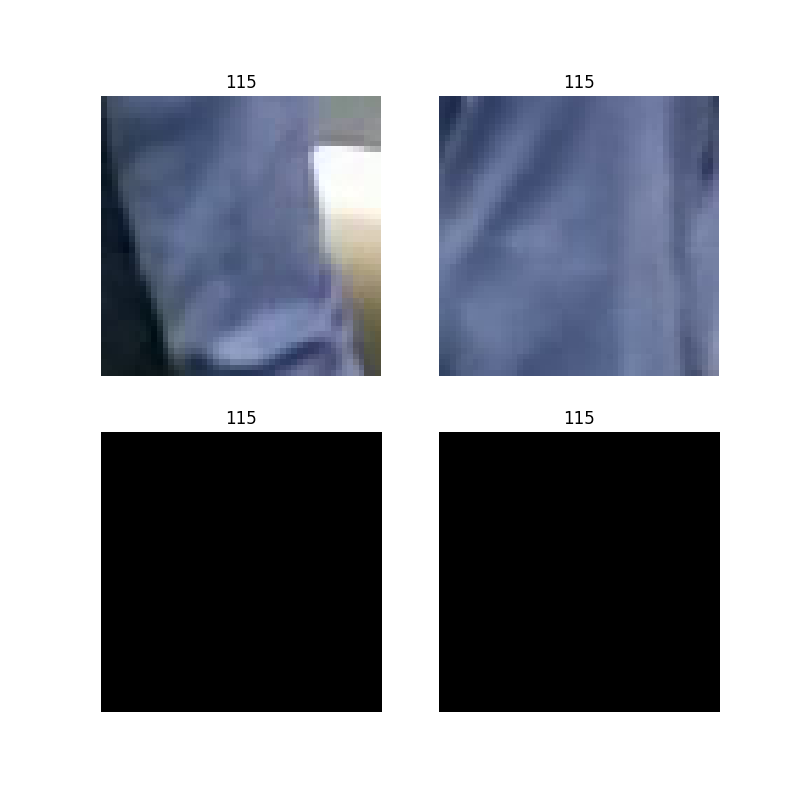

In [10]:
if hand_crops.shape[1] == 2:
    pad = np.zeros(hand_crops.shape, dtype=hand_crops.dtype)
    hand_crops = np.concatenate((hand_crops, pad), axis = 1)

# Using video for variable from above of shape (seq_len, 1080, 1920, 3)
f, (axs) = plt.subplots(2, 2)
f.set_size_inches(8, 8)
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[1, 0].axis('off')
axs[1, 1].axis('off')

s1_l = axs[0, 0].imshow(hand_crops[0, 0])
s1_r = axs[0, 1].imshow(hand_crops[0, 1])
s2_l = axs[1, 0].imshow(hand_crops[0, 2])
s2_r = axs[1, 1].imshow(hand_crops[0, 3])


def videoAnimation(frame_index):
    s1_l.set_data(hand_crops[frame_index, 0])
    s1_r.set_data(hand_crops[frame_index, 1])
    s2_l.set_data(hand_crops[frame_index, 2])
    s2_r.set_data(hand_crops[frame_index, 3])
    
    axs[0, 0].set_title(frame_index)
    axs[0, 1].set_title(frame_index)
    axs[1, 0].set_title(frame_index)
    axs[1, 1].set_title(frame_index)
    
    
    return s1_l

ani = animation.FuncAnimation(f, videoAnimation, interval = 200, frames = num_frames, repeat = False)

In [11]:
print(random.randint(0,1))

1
